# `5조` EDA

## 데이터셋 확인

### 기본 라이브러리 호출

In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib import style
import missingno as msno

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'

%matplotlib inline

### 데이터셋 확인

In [2]:
라면 = pd.read_csv('ramen-ratings.csv')
라면.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [3]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
국가 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
국가 = 국가[['continent','name','geometry']]
국가

,continent,name,geometry
0,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...
172,Europe,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### 변수 확인

#### 변수 정의

* `Review numbers` are contiguous: more recently reviewed ramen varieties have higher numbers.
* `Brand, Variety(the product name), Country, and Style` are pretty self-explanatory.
* `Stars` indicate the ramen quality, as assessed by the reviewer, on a 5-point scale

#### 변수 유형 및 데이터 타입

In [5]:
라면.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [6]:
라면.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


### 단변수 분석

* 결측치 임시 제거

In [7]:
라면['Stars'].value_counts().head(27).sort_values()

4.0       3
3.8       3
4.3       4
4.00      6
5.00      7
3.50      9
1.25     10
5.0      10
0.25     11
0.5      14
2.25     21
0        26
1        26
1.75     27
1.5      37
4.75     64
2.5      67
2        68
2.75     85
4.5     132
4.25    143
3.25    170
3       173
3.5     326
3.75    350
5       369
4       384
Name: Stars, dtype: int64

In [8]:
tmp = list(라면[라면['Stars']=='Unrated'].index)
라면 = 라면.drop(tmp)
라면.reset_index(drop=True,inplace=True)
라면['Stars'] = 라면['Stars'].astype(float)
라면

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2572,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN
2573,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN
2574,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN
2575,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN


,Stars
count,2577.000000
mean,3.654676
std,1.015331
min,0.000000
25%,3.250000
50%,3.750000
75%,4.250000
max,5.000000


C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

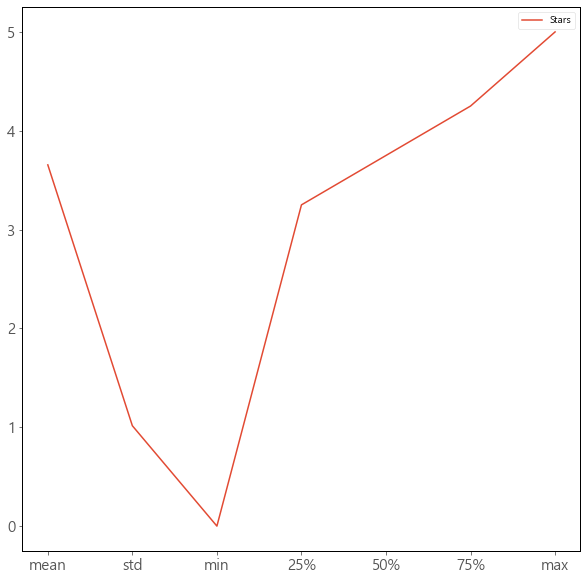

In [9]:
기초통계 = pd.DataFrame(라면['Stars'].describe())
display(기초통계)
기초통계 = 기초통계[1:]
기초통계.plot(figsize=(10,10),fontsize=15)

* `국가별` 라면

In [10]:
국가별라면_평점평균 = 라면.groupby('Country')['Stars'].mean().sort_values(ascending=False)
국가별라면_평점평균 = 국가별라면_평점평균[:13]
국가별라면_평점평균

Country
Brazil           4.350000
Sarawak          4.333333
Cambodia         4.200000
Malaysia         4.154194
Singapore        4.126147
Indonesia        4.067460
Japan            3.981605
Myanmar          3.946429
Fiji             3.875000
Hong Kong        3.801825
South Korea      3.790554
United States    3.750000
Mexico           3.730000
Name: Stars, dtype: float64

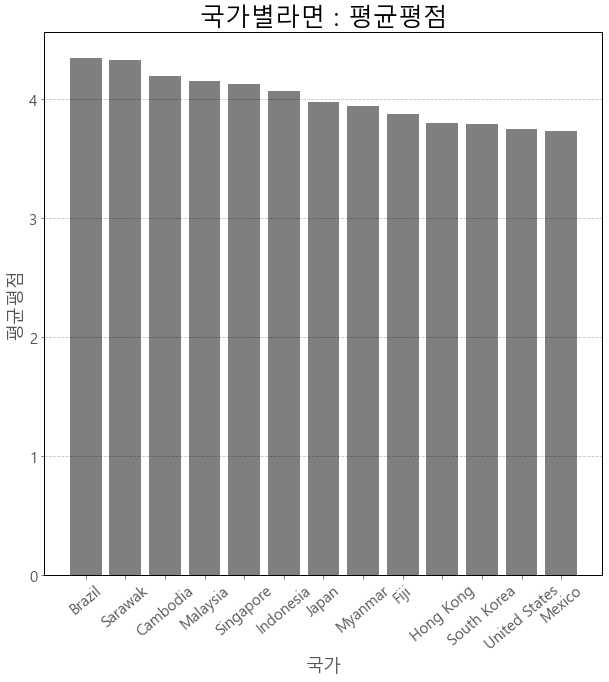

★ 한국 평균평점 3.7905537459283383 , 11위


In [11]:
label = list(국가별라면_평점평균.index)
index = np.arange(len(label))

plt.figure(figsize=(10,10))
plt.bar(index, 국가별라면_평점평균, color='k', alpha = 0.5)

plt.title('국가별라면 : 평균평점', fontsize=25)
plt.xlabel('국가', fontsize=18)
plt.ylabel('평균평점', fontsize=18)

plt.xticks(index, label, fontsize=15, rotation=40)
plt.yticks(fontsize=15)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

plt.savefig('국가별라면_막대그래프.png',dpi=300)
plt.show()
print('★','한국 평균평점',국가별라면_평점평균[10],',','11위')

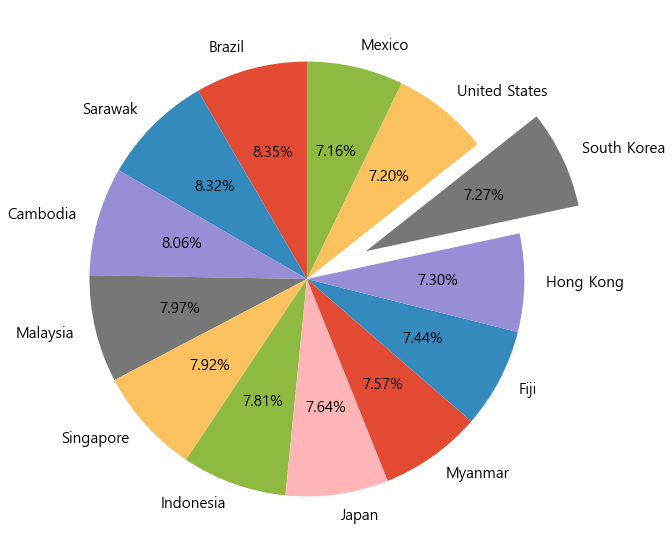

In [12]:
labels = list(국가별라면_평점평균.index)
frequency = 국가별라면_평점평균.values

plt.figure(figsize=(10,10))
plt.pie(frequency,  
        labels=labels,
        autopct='%.2f%%',
        shadow=False, 
        startangle=90,
        textprops={'fontsize':15},
        explode=(0,0,0,0,0,0,0,0,0,0,0.3,0,0)
        )
plt.savefig('국가별라면_파이그래프.png',dpi=300)
plt.show()

* `브랜드별` 라면

In [13]:
tmp = list(라면[라면['Stars']=='Unrated'].index)
라면 = 라면.drop(tmp)
라면.reset_index(drop=True,inplace=True)
라면['Stars'] = 라면['Stars'].astype(float)
라면

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2572,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,NaN
2573,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,NaN
2574,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,NaN
2575,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,NaN


In [14]:
한국라면 = 라면[라면['Country'] == 'South Korea'].reset_index(drop=True)

한국브랜드별라면_평점평균 = 한국라면.groupby('Brand')['Stars'].mean().sort_values(ascending=False)
한국브랜드별라면_평점평균 = 한국브랜드별라면_평점평균[:10]
print(한국브랜드별라면_평점평균)
print()

한국상품별라면_평점 = 한국라면.groupby('Variety')['Stars'].mean().sort_values(ascending=False)
한국상품별라면_평점 = 한국상품별라면_평점[:10]
print(한국상품별라면_평점)

Brand
Song Hak         5.000000
ChoripDong       5.000000
Foodmon          5.000000
Dongwon          4.500000
Chorip Dong      4.250000
Sempio           4.250000
GS25             4.250000
Samyang Foods    4.102041
HoMyeonDang      4.100000
Paldo            4.030769
Name: Stars, dtype: float64

Variety
Ramen E Ramen White Broth                     5.0
Jinjja Jinjja (New)                           5.0
Nagasaki Crab Jjampong                        5.0
Cheese Curry Ramyun                           5.0
Soon Veggie Noodle Soup                       5.0
King Bowl Super Spicy Pan Stirfried Noodle    5.0
Cheese Noodle                                 5.0
Raobokki Noodle (Export Version)              5.0
Maesaengyitangmyun Baked Noodle               5.0
Cheese Ramyun (for US market)                 5.0
Name: Stars, dtype: float64


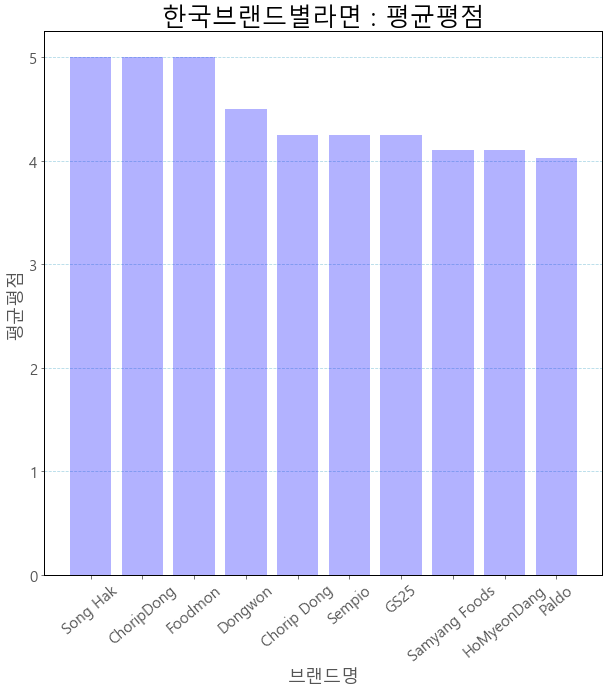

In [15]:
label = list(한국브랜드별라면_평점평균.index)
index = np.arange(len(label))

plt.figure(figsize=(10,10))
plt.bar(index, 한국브랜드별라면_평점평균, color='blue', alpha = 0.3)

plt.title('한국브랜드별라면 : 평균평점', fontsize=25)
plt.xlabel('브랜드명', fontsize=18)
plt.ylabel('평균평점', fontsize=18)

plt.xticks(index, label, fontsize=15, rotation=40)
plt.yticks(fontsize=15)
plt.grid(True, axis='y', color='lightblue', alpha=1, linestyle='--')

plt.savefig('한국브랜드별라면_막대그래프.png',dpi=300)
plt.show()

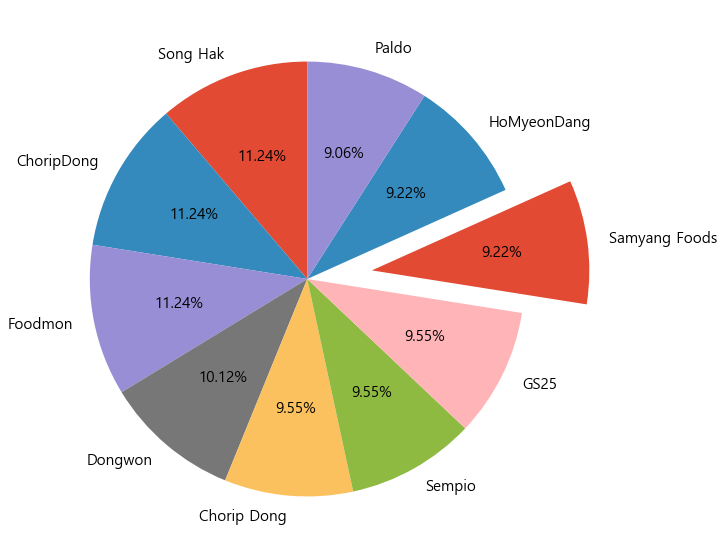

In [16]:
labels = list(한국브랜드별라면_평점평균.index)
frequency = 한국브랜드별라면_평점평균.values

plt.figure(figsize=(10,10))
plt.pie(frequency,  
        labels=labels,
        autopct='%.2f%%',
        shadow=False, 
        startangle=90,
        textprops={'fontsize':15},
        explode=(0,0,0,0,0,0,0,0.3,0,0)
        )
plt.savefig('한국브랜드별라면_파이그래프.png',dpi=300)
plt.show()

## 결측값 처리

### 결측값 시각화

In [17]:
라면 = pd.read_csv('ramen-ratings.csv')

In [18]:
Unrated_index = 라면[라면['Stars'] == 'Unrated'].index
rated_index = 라면[라면['Stars']!='Unrated'].index

for i in Unrated_index:
    라면.loc[i, 'Stars'] = np.nan
    
for i in rated_index:
    라면.loc[i,'Stars'] = float(라면.loc[i,'Stars'])

<AxesSubplot:>

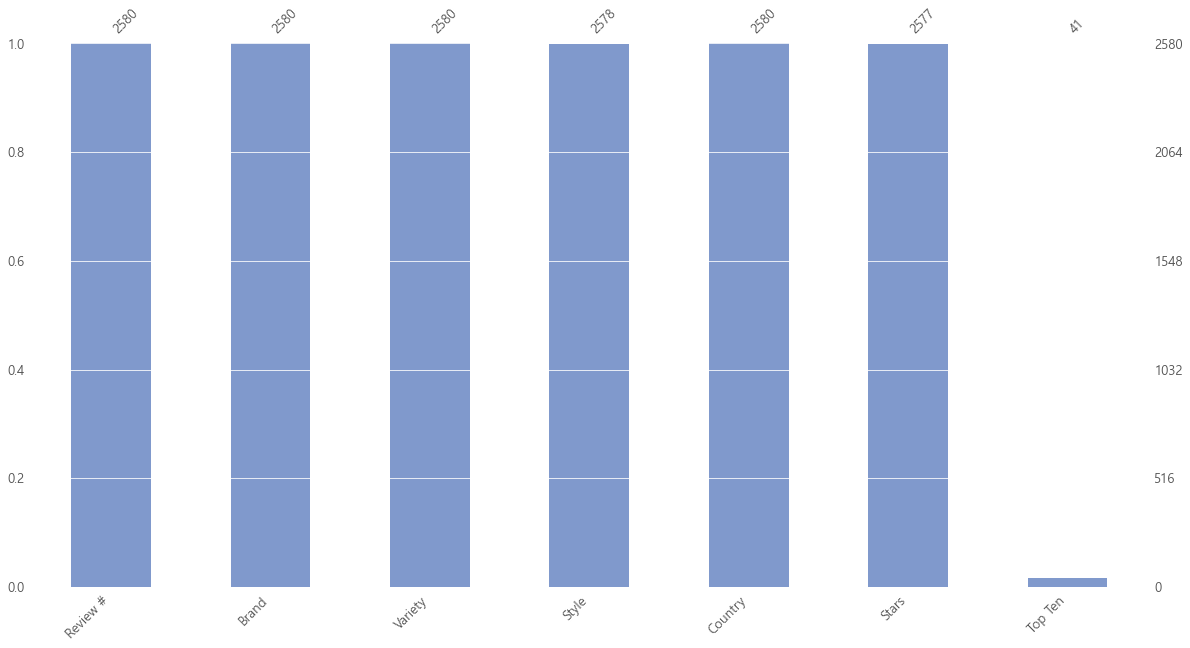

In [19]:
msno.bar(df=라면.iloc[:, :], color=(0.5, 0.6, 0.8), fontsize=13, figsize=(20,10))

<AxesSubplot:>

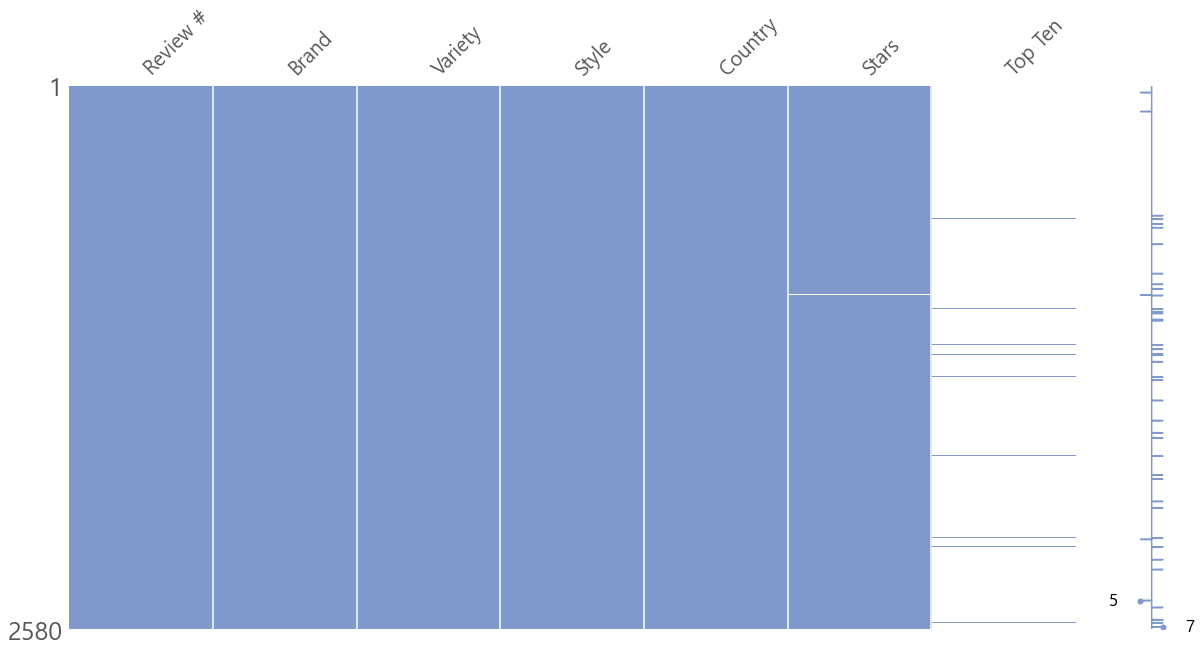

In [20]:
msno.matrix(df=라면.iloc[:, :], color=(0.5, 0.6, 0.8), fontsize=20, figsize=(20,10))

Style         2
Stars         3
Top Ten    2539
dtype: int64


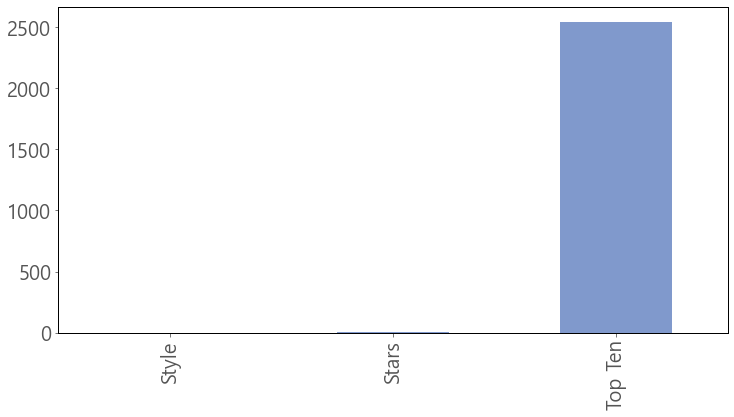

In [21]:
missing = 라면[['Style','Stars','Top Ten']].isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6), color=(0.5, 0.6, 0.8), fontsize=20)
print(라면[['Style','Stars','Top Ten']].isnull().sum())

In [22]:
isn = 라면.isnull().sum()
ntn = 라면.notnull().sum()
final_is = (isn/(isn+ntn))
final_nt = (ntn/(isn+ntn))

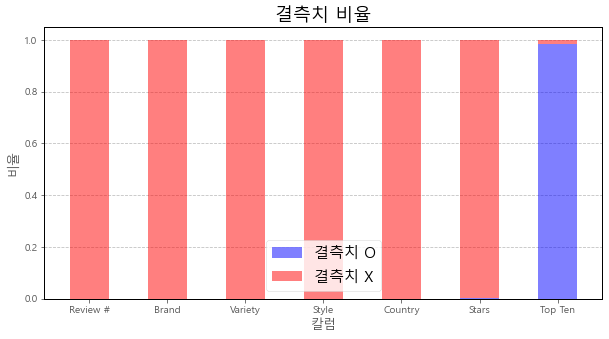

In [23]:
index = list(라면.columns)

plt.figure(figsize=(10,5))
p1 = plt.bar(index, final_is, color='b',alpha=0.5, width=0.5)
p2 = plt.bar(index, final_nt, color='r', alpha=0.5, bottom=final_is, width=0.5)
plt.title('결측치 비율', fontsize=18)
plt.ylabel('비율', fontsize=13)
plt.xlabel('칼럼', fontsize=13)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.legend((p1[0], p2[0]), ('결측치 O', '결측치 X'), fontsize=15)
plt.show()

### 결측값 삭제

* `결측치 제거`

#### Style 결측치 제거

In [24]:
라면[라면['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [25]:
스타일결측 = 라면[라면['Style'].isnull()].index
라면 = 라면.drop(스타일결측,axis=0).reset_index(drop=True)

In [26]:
라면['Style'].isnull().sum()

0

#### Stars 결측치 제거

In [27]:
라면[라면['Stars'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,NaN


In [28]:
스타결측 = 라면[라면['Stars'].isnull()].index
라면 = 라면.drop(스타결측,axis=0).reset_index(drop=True)

In [29]:
라면['Stars'].isnull().sum()

0

#### Top Ten 결측치 제거

In [30]:
print('n으로 표현된 값 :',라면['Top Ten'].value_counts()[0],'\n')
print('결측값(NaN으로 표현된 값) :',라면['Top Ten'].isnull().sum())

n으로 표현된 값 : 4 

결측값(NaN으로 표현된 값) : 2534


In [31]:
라면[라면['Top Ten'] == '\n']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1667,910,Paldo,Namja Ramyun,Bowl,South Korea,4.25,\n
1843,734,Indomie,Mi Goreng Rasa Ayam Panggang Jumbo (Local),Pack,Indonesia,5,\n
2244,332,Nongshim,Champong Oriental Noodles,Cup,South Korea,3.75,\n
2530,45,Indomie,Mi Goreng Sate,Pack,Indonesia,5,\n


In [32]:
라면[라면['Top Ten'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2570,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2571,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2572,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2573,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [33]:
n결측 = 라면[라면['Top Ten'] == '\n'].index

for i in n결측:
    라면.loc[i,'Top Ten'] = np.nan
    
print('결측값(NaN으로 표현된 값) :',라면['Top Ten'].isnull().sum())

결측값(NaN으로 표현된 값) : 2538


In [34]:
# 탑텐결측 = 라면[라면['Top Ten'].isnull()].index
# 라면 = 라면.drop(탑텐결측,axis=0).reset_index(drop=True)

In [35]:
# 라면['Top Ten'].isnull().sum()

### 결측값 대체

* `결측치 대체` : 같은 특징을 갖는 다른 데이터 살펴보기

In [36]:
라면 = pd.read_csv('ramen-ratings.csv')

In [37]:
n결측 = 라면[라면['Top Ten'] == '\n'].index

for i in n결측:
    라면.loc[i,'Top Ten'] = np.nan
    
print('결측값(NaN으로 표현된 값) :',라면['Top Ten'].isnull().sum())

결측값(NaN으로 표현된 값) : 2543


#### Style 결측치 대체

In [38]:
display(라면[라면['Style'].isnull()])

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [39]:
display(라면[(라면['Brand'] == 'Kamfen')&(라면['Country'] == 'China')])
display(라면[(라면['Brand'] == 'Unif')&(라면['Country'] == 'Taiwan')])

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1638,942,Kamfen,E-men Lobster Soup,Pack,China,3.25,NaN
1649,931,Kamfen,dried Mix Noodles Soya Bean Paste,Tray,China,3.75,NaN
1652,928,Kamfen,Dried Mix Noodles Artificial Spicy Pork,Tray,China,4,NaN
2094,486,Kamfen,Japanese U-Don Lobster Scallop,Pack,China,3,NaN
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2187,393,Kamfen,Dried Mix Noodles XO Sauce,Tray,China,2,NaN
2399,181,Kamfen,Noodle King Thin Wonton,Pack,China,2,NaN
2441,139,Kamfen,Noodle King Beef,Pack,China,1.75,NaN


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1414,1166,Unif,Man Han Feast Sichuan Chilli Eel Flavor,Bowl,Taiwan,5,NaN
1874,706,Unif,Man Han Feast Spring Onion Eel,Bowl,Taiwan,4.25,NaN
2144,436,Unif,Artificial Beef With Sauerkraut,Bowl,Taiwan,3.75,NaN
2258,322,Unif,Shrimp Fish,Bowl,Taiwan,3.75,NaN
2262,318,Unif,Super Bowl Artificial Pickled Chilli Beef,Bowl,Taiwan,3.25,NaN
2264,316,Unif,Super Bowl Artificial Stewed Pork Chop,Bowl,Taiwan,3.5,NaN
2265,315,Unif,Super Bowl Artificial Spicy Beef,Bowl,Taiwan,2.75,NaN
2331,249,Unif,100 Artificial Spicy Beef,Pack,Taiwan,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN
2449,131,Unif,100 Artificial Shallot Chicken,Pack,Taiwan,3.25,NaN


* 위의 데이터프레임의 경우, Pack과 Tray / 아래의 경우 Bowl과 Pack으로 대체 가능
* 그러나, 전체 데이터셋에 비해 결측 비율이 작을 경우 대체보단 삭제가 더 보편적
* 또한, 이 경우 2가지밖에 없으므로 추가 데이터 서치로 해결 가능

#### Stars 결측치 대체

* `결측치 대체` : 같은 특징을 갖는 다른 데이터 살펴보기

In [40]:
Unrated_index = 라면[라면['Stars'] == 'Unrated'].index
rated_index = 라면[라면['Stars']!='Unrated'].index

for i in Unrated_index:
    라면.loc[i, 'Stars'] = np.nan
    
for i in rated_index:
    라면.loc[i,'Stars'] = float(라면.loc[i,'Stars'])

In [41]:
display(라면[라면['Stars'].isnull()])

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,NaN


In [42]:
display(라면[(라면['Brand'] == 'Ottogi')&(라면['Country'] == 'South Korea')&(라면['Style'] == 'Pack')])
display(라면[(라면['Brand'] == 'Samyang Foods')&(라면['Country'] == 'South Korea')&(라면['Style'] == 'Pack')])
display(라면[(라면['Brand'] == 'Mi E-Zee')&(라면['Country'] == 'Malaysia')&(라면['Style'] == 'Pack')])

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,NaN
50,2530,Ottogi,Ppushu Ppushu Noodle Snack Honey Butter,Pack,South Korea,2,NaN
106,2474,Ottogi,Ppushu Ppushu Noodle Snack Chilli Cheese Flavor,Pack,South Korea,4.25,NaN
189,2391,Ottogi,Jin Jjambbong Spicy Seafood Ramyun,Pack,South Korea,5,NaN
688,1892,Ottogi,Cheese Ramen,Pack,South Korea,4,NaN
930,1650,Ottogi,Sesame Flavor Ramen Korean Style Instant Noodle,Pack,South Korea,4.25,NaN
1089,1491,Ottogi,Potato Ramen,Pack,South Korea,3.75,NaN
1162,1418,Ottogi,Ppushu Ppushu Grilled Chicken Flavor,Pack,South Korea,1,NaN
1264,1316,Ottogi,Japchae Vermicelli Noodle,Pack,South Korea,2.75,NaN
1302,1278,Ottogi,Ppushu Ppushu Noodle Snack Bulgogi Flavor,Pack,South Korea,3.25,NaN


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
30,2550,Samyang Foods,Paegaejang Ramen,Pack,South Korea,5,NaN
72,2508,Samyang Foods,Mala Buldak Bokkeummyun,Pack,South Korea,3.75,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,NaN
156,2424,Samyang Foods,Cheese Type Buldak Bokkeummyun (Black Pkg),Pack,South Korea,3.75,NaN
210,2370,Samyang Foods,Zzaldduck Buldak Bokkeummyun Snack,Pack,South Korea,4.5,NaN
211,2369,Samyang Foods,Curry Buldak Bokkeummyun,Pack,South Korea,4.25,NaN
212,2368,Samyang Foods,Cool/Ice Buldak Bokkeummyun,Pack,South Korea,3.75,NaN
213,2367,Samyang Foods,2x Spicy Haek Buldak Bokkeummyun,Pack,South Korea,4,NaN
214,2366,Samyang Foods,Buldak Bokkeummyun Snack,Pack,South Korea,5,NaN


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
989,1591,Mi E-Zee,Perisa Sayuran,Pack,Malaysia,3.5,NaN
990,1590,Mi E-Zee,Perisa Kari Sayuran,Pack,Malaysia,3.75,NaN
992,1588,Mi E-Zee,Perisa Bayam,Pack,Malaysia,3.5,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,NaN
998,1582,Mi E-Zee,Perisa Kari / Curry Flavour,Pack,Malaysia,4,NaN


In [43]:
라면.loc[122,'Stars'] = (라면[(라면['Brand'] == 'Samyang Foods')&(라면['Country'] == 'South Korea')&(라면['Style'] == 'Pack')])['Stars'].mean()
라면.loc[993,'Stars'] = (라면[(라면['Brand'] == 'Mi E-Zee')&(라면['Country'] == 'Malaysia')&(라면['Style'] == 'Pack')])['Stars'].mean()

In [44]:
라면.loc[32,'Stars'] = (라면[(라면['Brand'] == 'Ottogi')&(라면['Country'] == 'South Korea')&(라면['Style'] == 'Pack')])['Stars'].mean()

#### Top Ten 결측치 대체

* `Top10`과 `Review #`이 연관있을 경우, 회귀식으로 도출하여 결측치를 채우는 방법

In [45]:
탑텐인덱스 = 라면[라면['Top Ten'].notnull()]['Top Ten'].index
상관계수 = 라면.iloc[탑텐인덱스,:][['Review #','Top Ten']]
상관계수

,Review #,Top Ten
616,1964,2016 #10
633,1947,2016 #1
655,1925,2016 #8
673,1907,2016 #5
752,1828,2016 #9
891,1689,2016 #7
942,1638,2015 #10
963,1617,2015 #7
995,1585,2015 #4
1059,1521,2015 #9


In [46]:
상관계수['Top Ten'] = 상관계수[상관계수['Top Ten'].notnull()]['Top Ten'].str.split('#').str[1]
상관계수['Top Ten'] = 상관계수['Top Ten'].astype(int)
display(상관계수)
display(상관계수.corr())

,Review #,Top Ten
616,1964,10
633,1947,1
655,1925,8
673,1907,5
752,1828,9
891,1689,7
942,1638,10
963,1617,7
995,1585,4
1059,1521,9


,Review #,Top Ten
Review #,1.000000,0.281563
Top Ten,0.281563,1.000000


In [47]:
라면['Top Ten'] = 라면['Top Ten'].fillna(0)
for i in 상관계수.index:
    라면.loc[i,'Top Ten'] = 상관계수['Top Ten'][i]

In [48]:
라면['Top Ten'] = 라면['Top Ten'].astype(int)
라면[['Review #','Top Ten']].corr()

,Review #,Top Ten
Review #,1.000000,-0.014285
Top Ten,-0.014285,1.000000


## 이상치 처리

### 이상치 제거

* 표준점수 기반 `이상치 제거`

In [49]:
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])): 
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN) # optional
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))].fillna(0)

In [50]:
라면['Stars'] = 라면['Stars'].astype(float)
스타 = 라면[['Stars']]
스타.describe()

,Stars
count,2580.000000
mean,3.654749
std,1.014839
min,0.000000
25%,3.250000
50%,3.750000
75%,4.250000
max,5.000000


In [51]:
std_based_outlier(스타)
스타.describe()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Stars
count,2554.000000
mean,3.691955
std,0.950248
min,0.100000
25%,3.250000
50%,3.750000
75%,4.250000
max,5.000000


* IQR 기반 `이상치 제거`

In [52]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        return multiple_outliers
    
Outliers_to_drop = detect_outliers(스타, 2, ['Stars'])

In [53]:
스타.loc[Outliers_to_drop]

,Stars


In [54]:
스타 = 스타.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

* 5점 척도에서는 IQR 기반으로 이상치를 발견할 수 없음을 알 수 있음
* 설문데이터 기반이 아니기때문에, 이상치 처리가 어려움

### 이상치 대체

* 이상치 대체 : 표준화이후, 3시그마 이내 데이터를 제외한 데이터를 모두 3시그마 범위로 조절

In [55]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(스타[:]))
스타[:] = robustScaler.transform(스타[:])

RobustScaler()


In [56]:
스타.describe()

,Stars
count,2554.000000
mean,-0.058045
std,0.950248
min,-3.650000
25%,-0.500000
50%,0.000000
75%,0.500000
max,1.250000


### 이상치 군집 분리

* 군집으로 분리 : Top Ten과 Top Ten이 아닌 데이터셋을 구별하여 분석

In [57]:
탑텐O = 라면[라면['Top Ten'] != 0]
탑텐X = 라면[라면['Top Ten'] == 0]

In [58]:
탑텐O

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,9


## 개인별 소주제

### 데이터셋 전처리

* 보여주는 DataFrame의 범위 확장

In [59]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

* 홍콩과 싱가폴은 Polygon(지도화를 가능하게 해주는 범위 데이터)가 없어서 이를 포인트로 대체

In [60]:
# 전처리 : 홍콩과 싱가포르 데이터셋 추가

홍콩포인트 = gpd.points_from_xy([114.109497], [22.396428])
싱가폴포인트 = gpd.points_from_xy([103.8499619],[1.2894066])

국가.loc['177'] = ['Asia','Hong Kong',홍콩포인트]
국가.loc['178'] = ['Asia','Singapore', 싱가폴포인트]

* list(set(list()))를 활용
* 국가 데이터프레임 내 Polygon 데이터를 사용할 수 없는 라면['Country'] 이름을 설정

In [61]:
# list,set,list 활용

국가리스트 = list(국가['name'].unique())
라면국가리스트 = list(라면['Country'].unique())

In [62]:
국가리스트 = set(국가리스트)
라면국가리스트 = set(라면국가리스트)
국가중복처리 = list(라면국가리스트 - 국가리스트)
print('중복된 국가 확인 :',국가중복처리)

중복된 국가 확인 : ['UK', 'Dubai', 'United States', 'USA', 'Sarawak', 'Holland']


In [63]:
일 = 라면[라면['Country'] == 'UK'].index
이 = 라면[라면['Country'] == 'USA'].index
삼 = 라면[라면['Country'] == 'United States'].index
사 = 라면[라면['Country'] == 'Sarawak'].index
오 = 라면[라면['Country'] == 'Holland'].index
육 = 라면[라면['Country'] == 'Dubai'].index

In [64]:
for i in 일: # UK
    라면.loc[i,'Country'] = 'United Kingdom'
for i in 이: # USA
    라면.loc[i,'Country'] = 'United States of America'
for i in 삼: # USA
    라면.loc[i,'Country'] = 'United States of America'
for i in 사: # Sarawak
    라면.loc[i,'Country'] = 'Malaysia'
for i in 오: # Holland
    라면.loc[i,'Country'] = 'Netherlands'
for i in 육: # Dubai
    라면.loc[i,'Country'] = 'United Arab Emirates'

* 필요한 Columns만 불러오기
* merge할 때, `key값을 일치`시키기위하여 칼럼명 변경 : `'name'` → `'Country'`

In [65]:
국가.columns = ['continent','Country','geometry']

In [66]:
국가라면 = pd.merge(라면,국가,on='Country')
국가라면.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,continent,geometry
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,Asia,"(POLYGON ((141.884600864835 39.18086456965148,..."
1,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,0,Asia,"(POLYGON ((141.884600864835 39.18086456965148,..."
2,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,0,Asia,"(POLYGON ((141.884600864835 39.18086456965148,..."
3,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,0,Asia,"(POLYGON ((141.884600864835 39.18086456965148,..."
4,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.50,0,Asia,"(POLYGON ((141.884600864835 39.18086456965148,..."


### 국가별 인기있는 라면을 Top1을 뽑아서, Variety와 연관있는지 확인

* 국가별 랭킹1위 라면을 선정

In [67]:
그룹화 = pd.pivot_table(국가라면, index = ['Country','Variety'])
그룹화

Review #  Stars  \
Country   Variety                                                               
Australia 2 Minute Laksa Flavour Noodles                        2011.0   2.00   
          Chow Mein Soft Noodles                                 961.0   2.75   
          Fusian Special Edition Ow... Ow... Spicy Cow Mi...    2068.0   5.00   
          Hot & Spicy 2 Minute Noodles                           948.0   3.50   
          Instant Noodles Beef Flavour                          2029.0   2.00   
...                                                                ...    ...   
Vietnam   Tu Quy Spicy Beef                                      417.0   3.50   
          Tu quy Chicken                                         426.0   3.00   
          Viet Cuisine Bun Rieu Cua Sour Crab Soup Instan...    2354.0   5.00   
          Viet Rice Noodles Chicken                              873.0   3.50   
          Xi Gon Satay Onion Flavor                             1659.0   2.75   

                                                              Top Ten  
Country   Variety                                                      
Australia 2 Minute Laksa Flavour Noodles                          0.0  
          Chow Mein Soft Noodles                                  0.0  
          Fusian Special Edition Ow... Ow... Spicy Cow Mi...      0.0  
          Hot & Spicy 2 Minute Noodles                            0.0  
          Instant Noodles Beef Flavour                            0.0  
...                                                               ...  
Vietnam   Tu Quy Spicy Beef                                       0.0  
          Tu quy Chicken                                          0.0  
          Viet Cuisine Bun Rieu Cua Sour Crab Soup Instan...      0.0  
          Viet Rice Noodles Chicken                               0.0  
          Xi Gon Satay Onion Flavor                               0.0  

[2486 rows x 3 columns]

In [68]:
그룹화 = 그룹화.reset_index()
그룹화

,Country,Variety,Review #,Stars,Top Ten
0,Australia,2 Minute Laksa Flavour Noodles,2011.0,2.00,0.0
1,Australia,Chow Mein Soft Noodles,961.0,2.75,0.0
2,Australia,Fusian Special Edition Ow... Ow... Spicy Cow M...,2068.0,5.00,0.0
3,Australia,Hot & Spicy 2 Minute Noodles,948.0,3.50,0.0
4,Australia,Instant Noodles Beef Flavour,2029.0,2.00,0.0
...,...,...,...,...,...
2481,Vietnam,Tu Quy Spicy Beef,417.0,3.50,0.0
2482,Vietnam,Tu quy Chicken,426.0,3.00,0.0
2483,Vietnam,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...,2354.0,5.00,0.0
2484,Vietnam,Viet Rice Noodles Chicken,873.0,3.50,0.0


In [69]:
그룹화

,Country,Variety,Review #,Stars,Top Ten
0,Australia,2 Minute Laksa Flavour Noodles,2011.0,2.00,0.0
1,Australia,Chow Mein Soft Noodles,961.0,2.75,0.0
2,Australia,Fusian Special Edition Ow... Ow... Spicy Cow M...,2068.0,5.00,0.0
3,Australia,Hot & Spicy 2 Minute Noodles,948.0,3.50,0.0
4,Australia,Instant Noodles Beef Flavour,2029.0,2.00,0.0
...,...,...,...,...,...
2481,Vietnam,Tu Quy Spicy Beef,417.0,3.50,0.0
2482,Vietnam,Tu quy Chicken,426.0,3.00,0.0
2483,Vietnam,Viet Cuisine Bun Rieu Cua Sour Crab Soup Insta...,2354.0,5.00,0.0
2484,Vietnam,Viet Rice Noodles Chicken,873.0,3.50,0.0


In [70]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from PIL import Image

t = Twitter()

C:\Users\USER\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [71]:
def 세계인기라면(df,i):
    return df[df['Country'] == i].sort_values(by=['Stars'
                                                  ,'Review #']
                                              ,ascending=False).reset_index(drop=True)['Variety'][0]

* 라면 이름 list를 만듦
* 라면 이름들 중에 '신라면  '과 같이 공백이 있는 부분 제거
* 라면 이름들을 띄어쓰기로 분할 ex) '이경규가 만든 꼬꼬면' → '이경규가','만든','꼬꼬면'

In [72]:
uniqu_lst = sorted(list(그룹화['Country'].unique()))

result = []
for i in uniqu_lst:
    result.append(세계인기라면(그룹화,i))

In [73]:
words = []
for i in range(len(result)):
    result[i] = result[i].strip()
    result[i] = result[i].split(' ')
    for j in result[i]:
        words.append(j)
        
words = sorted(words)

* 필요없는 문자열내 `특정 문자` 제거

In [74]:
stopwords = ['&','(',')','.','...','A','á']

In [75]:
tokenized_data = []
for i in words:
    temp_X = t.morphs(i) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)
tokenized_data = [v for v in tokenized_data if v]

In [76]:
icon = Image.open('circle.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

* list 원소들을 하나의 문자열로 합침 : join 함수 이용
* Wordcloud 형성

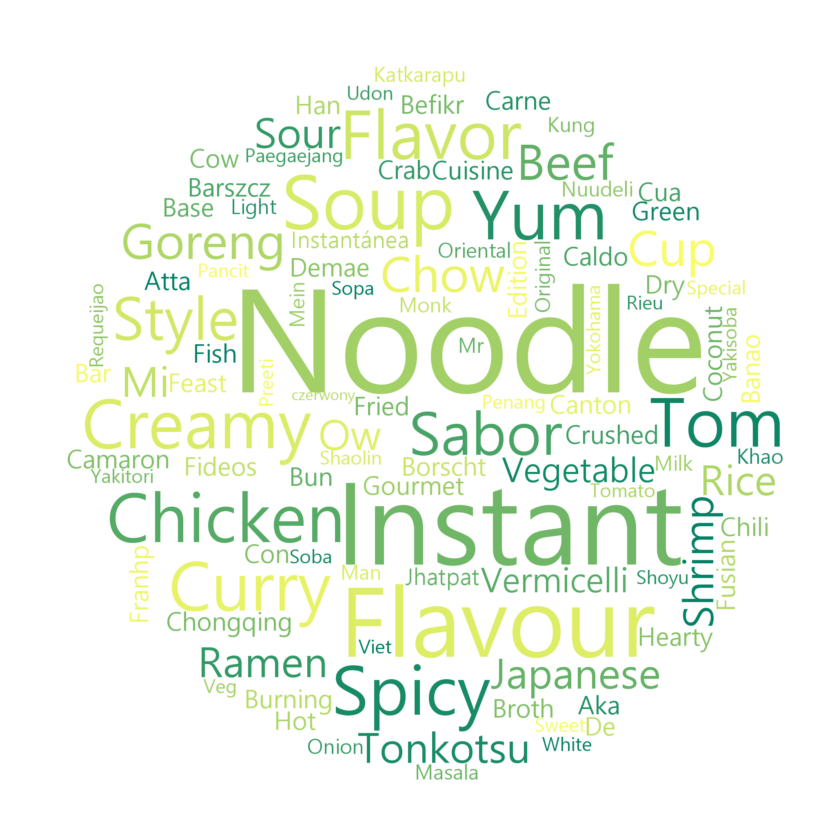

In [77]:
wcloud = ' '.join(words)
text = wcloud
wordcloud = WordCloud(max_font_size=350, font_path ="c:/Windows/Fonts/malgun.ttf",
                      min_font_size = 20, mask = mask,
                      width=10, height=10, colormap = 'summer',
                      margin=2,collocations=False, 
                      background_color = 'white').generate(text)
    
fig = plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show
plt.savefig('wcloud1.png')

### Top Ten 라면을 가진 국가 시각화

In [78]:
import folium

In [79]:
탑텐 = 국가라면[국가라면['Top Ten'] != 0].reset_index(drop=True)
tmpp = pd.DataFrame(탑텐.groupby(['Country'])['Top Ten'].count()).reset_index()
tmpp

,Country,Top Ten
0,China,1
1,Hong Kong,1
2,Indonesia,4
3,Japan,6
4,Malaysia,6
5,Myanmar,1
6,Singapore,7
7,South Korea,5
8,Taiwan,2
9,Thailand,3


In [80]:
탑텐['Count'] = 0
for i in 탑텐.index:
    for j in range(len(tmpp)):
        if 탑텐.loc[i,'Country'] == tmpp['Country'][j]:
            탑텐.loc[i,'Count'] = tmpp['Top Ten'][j]

In [81]:
탑텐 = 탑텐[['Country','Count','geometry']]
탑텐 = 탑텐.iloc[[0,6,8,9,14,21,24,25,31,35,36],:].reset_index(drop=True)
탑텐

,Country,Count,geometry
0,Japan,6,"(POLYGON ((141.884600864835 39.18086456965148,..."
1,Taiwan,2,"POLYGON ((121.7778178243899 24.3942735865194, ..."
2,United States of America,1,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
3,South Korea,5,"POLYGON ((126.1747587423762 37.74968577732804,..."
4,Singapore,7,[POINT (103.8499619 1.2894066)]
5,Thailand,3,"POLYGON ((105.2187768900789 14.27321177821069,..."
6,Hong Kong,1,[POINT (114.109497 22.396428)]
7,Malaysia,6,(POLYGON ((100.0857568705271 6.464489447450291...
8,Indonesia,4,(POLYGON ((141.0002104025918 -2.60015105551566...
9,China,1,(POLYGON ((109.4752095886636 18.19770091396857...


In [82]:
폴리곤 = 탑텐.iloc[[0,1,2,3,5,7,8,9,10],:].reset_index(drop=True)
폴리곤

,Country,Count,geometry
0,Japan,6,"(POLYGON ((141.884600864835 39.18086456965148,..."
1,Taiwan,2,"POLYGON ((121.7778178243899 24.3942735865194, ..."
2,United States of America,1,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
3,South Korea,5,"POLYGON ((126.1747587423762 37.74968577732804,..."
4,Thailand,3,"POLYGON ((105.2187768900789 14.27321177821069,..."
5,Malaysia,6,(POLYGON ((100.0857568705271 6.464489447450291...
6,Indonesia,4,(POLYGON ((141.0002104025918 -2.60015105551566...
7,China,1,(POLYGON ((109.4752095886636 18.19770091396857...
8,Myanmar,1,"POLYGON ((100.1159875834178 20.41784963630819,..."


In [83]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

crs = {'init': 'epsg:4326'}
폴리곤 = GeoDataFrame(폴리곤, crs=crs, geometry=폴리곤['geometry'])
폴리곤

폴리곤2 = 폴리곤.to_json()

m = folium.Map(
    location=[25,116],
    zoom_start=3)

folium.Choropleth(
    geo_data = 폴리곤2,
    data = 폴리곤,
    columns = ['Country', 'Count'],
    key_on = "feature.properties.Country",
    fill_color = "BuPu").add_to(m)

folium.Marker(
  location=[1.2894066,103.8499619],
  icon=folium.Icon(color='red',icon='star')
).add_to(m)

folium.Marker(
  location=[22.396428,114.109497],
  icon=folium.Icon(color='red',icon='star')
).add_to(m)

m